In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/home/dhgbao/VinBrain/Pneumothorax_Segmentation/dataset/annotations/stage_2_train.csv", usecols=['ImageId', 'EncodedPixels'])

In [2]:
df['ImageId'].unique().shape

(12047,)

In [3]:
df['ImageId'].shape

(12954,)

In [2]:
df['ImageId'].value_counts()

1.2.276.0.7230010.3.1.4.8323329.1851.1517875169.919023     10
1.2.276.0.7230010.3.1.4.8323329.5073.1517875186.287848      8
1.2.276.0.7230010.3.1.4.8323329.13026.1517875243.170116     8
1.2.276.0.7230010.3.1.4.8323329.497.1517875163.185132       7
1.2.276.0.7230010.3.1.4.8323329.2878.1517875175.188420      6
                                                           ..
1.2.276.0.7230010.3.1.4.8323329.2642.1517875173.857757      1
1.2.276.0.7230010.3.1.4.8323329.13307.1517875244.601038     1
1.2.276.0.7230010.3.1.4.8323329.31978.1517875157.808201     1
1.2.276.0.7230010.3.1.4.8323329.1237.1517875166.904962      1
1.2.276.0.7230010.3.1.4.8323329.31754.1517875156.625088     1
Name: ImageId, Length: 12047, dtype: int64

### Aggregate multiple masks

In [1]:
"1.2.276.0.7230010.3.1.4.8323329.13291.1517875244.527846.png"

'1.2.276.0.7230010.3.1.4.8323329.13291.1517875244.527846.png'

In [2]:
annotations = ["826700 13 1007 27 996 38 986 43 983 50 978 48 981 47 982 45 984 41 993 32 1006 18 1016 8", "702560 4 1019 6 1016 9 1014 11 1014 10 1014 11 1013 11 1013 12 1012 12 1013 12 1012 12 1012 13 1011 13 1011 13 1012 13 1011 13 1011 13 1011 13 1012 13 1011 13 1012 12 1012 12 1012 12 1013 12 1012 12 1013 11 1014 10 1015 9 1016 7 1018 6 1019 4", "793856 7 1015 11 1011 15 1008 18 1004 23 1000 26 997 29 993 34 989 37 986 41 981 44 979 46 977 48 977 48 978 48 978 47 979 46 980 45 982 42 984 41 985 39 988 37 989 36 990 35 991 34 993 32 1005 20 1010 14 1014 9", "794887 8 1011 17 1002 24 993 33 989 37 985 42 980 45 977 48 975 51 972 53 969 56 967 59 964 61 962 63 960 65 960 65 959 66 958 67 957 68 957 68 957 68 957 68 958 67 959 65 961 64 961 63 963 61 965 60 966 58 969 56 972 52 974 50 976 48 978 46 982 41 988 36 992 31 995 27 1001 22 1012 10", "697438 2 1018 10 1014 11 1013 13 1011 14 1010 15 1009 16 1009 15 1009 16 1008 16 1008 17 1007 17 1008 17 1007 17 1008 17 1007 17 1007 18 1007 17 1007 17 1008 17 1007 17 1007 18 1007 17 1007 18 1007 17 1007 17 1008 16 1009 15 1010 14 1010 14 1011 13 1012 12 1013 11 1014 9 1016 8 1017 6"]

In [33]:
def rle2mask(rle, width, height):
    mask= np.zeros(width* height)
    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]
    lengths = array[1::2]

    current_position = 0
    for index, start in enumerate(starts):
        current_position += start
        mask[current_position:current_position+lengths[index]] = 255
        current_position += lengths[index]

    return mask.reshape(width, height)

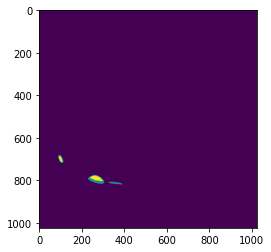

In [35]:
full_mask = np.zeros((1024, 1024))
for idx, annotation in enumerate(annotations):
    mask = rle2mask(annotation, 1024, 1024)
    full_mask += mask
    # show mask as plt image
    # plt show multiple images
    # plt.subplot(2, 3, idx+1)
    # plt.imshow(mask)
plt.imshow(full_mask)

In [26]:
new_ann = ' '.join(annotations)
new_ann

'826700 13 1007 27 996 38 986 43 983 50 978 48 981 47 982 45 984 41 993 32 1006 18 1016 8 702560 4 1019 6 1016 9 1014 11 1014 10 1014 11 1013 11 1013 12 1012 12 1013 12 1012 12 1012 13 1011 13 1011 13 1012 13 1011 13 1011 13 1011 13 1012 13 1011 13 1012 12 1012 12 1012 12 1013 12 1012 12 1013 11 1014 10 1015 9 1016 7 1018 6 1019 4 793856 7 1015 11 1011 15 1008 18 1004 23 1000 26 997 29 993 34 989 37 986 41 981 44 979 46 977 48 977 48 978 48 978 47 979 46 980 45 982 42 984 41 985 39 988 37 989 36 990 35 991 34 993 32 1005 20 1010 14 1014 9 794887 8 1011 17 1002 24 993 33 989 37 985 42 980 45 977 48 975 51 972 53 969 56 967 59 964 61 962 63 960 65 960 65 959 66 958 67 957 68 957 68 957 68 957 68 958 67 959 65 961 64 961 63 963 61 965 60 966 58 969 56 972 52 974 50 976 48 978 46 982 41 988 36 992 31 995 27 1001 22 1012 10 697438 2 1018 10 1014 11 1013 13 1011 14 1010 15 1009 16 1009 15 1009 16 1008 16 1008 17 1007 17 1008 17 1007 17 1008 17 1007 17 1007 18 1007 17 1007 17 1008 17 1007 17 

[826700   1007    996    986    983    978    981    982    984    993
   1006   1016 702560   1019   1016   1014   1014   1014   1013   1013
   1012   1013   1012   1012   1011   1011   1012   1011   1011   1011
   1012   1011   1012   1012   1012   1013   1012   1013   1014   1015
   1016   1018   1019 793856   1015   1011   1008   1004   1000    997
    993    989    986    981    979    977    977    978    978    979
    980    982    984    985    988    989    990    991    993   1005
   1010   1014 794887   1011   1002    993    989    985    980    977
    975    972    969    967    964    962    960    960    959    958
    957    957    957    957    958    959    961    961    963    965
    966    969    972    974    976    978    982    988    992    995
   1001   1012 697438   1018   1014   1013   1011   1010   1009   1009
   1009   1008   1008   1007   1008   1007   1008   1007   1007   1007
   1007   1008   1007   1007   1007   1007   1007   1007   1008   1009
   101

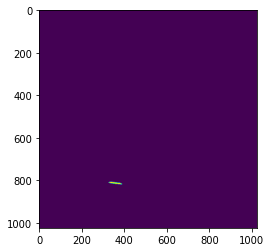

In [32]:
mask = rle2mask(new_ann, 1024, 1024)
print(len(mask))
# show mask as plt image
plt.imshow(mask)

In [ ]:
# save_name1 = image_name.replace(".png", "") + "_mini_mask" + str(idx) + ".png"
# cv2.imwrite(os.path.join("../../dataset/pngs/segmentation_masks/train_mask", save_name1), mask)
# save_name2 = image_name.replace(".png", "") + "_full_mask" + ".png"
